%%latex
### Linear Regression
We got the data pairs $(x_k,y_k)$ and want to find the best fit $\hat{y} = m\hat{x}+b$ using least squares
\begin{align}
f(m,b)&=\sum_k(\hat{y}_k-y_k)^2\\ 
      &=\sum_k(m\hat{x}_k+b-y_k)^2\\
\min_{m,b} f(m,b)
\end{align}
Meaning
\begin{align}
\frac{\partial f(m,b)}{\partial m}&=\sum_k2(m\hat{x}_k+b-y_k)\hat{x}_k\\
        &=2m\sum_k\hat{x}^2_k+2b\sum_kx_k-2\sum_ky_k\hat{x}_k\\
        &=0\\
\frac{\partial f(m,b)}{\partial b}&=\sum_k2(m\hat{x}_k+b-y_k)\\
        &=2m\sum_k\hat{x}_k+2b K -2\sum_k y_k\\
        &=0
\end{align}
So the problem is equivalent to solve a system of linear equations for $m$ and $b$
\begin{align}
m\sum_k\hat{x}^2_k+b\sum_kx_k-\sum_ky_k\hat{x}_k=0\\
m\sum_k\hat{x}_k+b K -\sum_k y_k=0
\end{align}

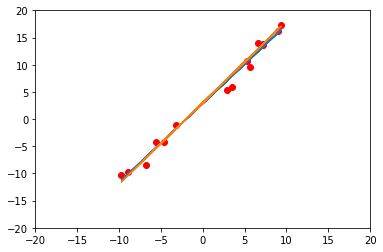

InputParameters    - slope: 1.50001     offset: 3.0001
regression by hand - slope: 1.44826     offset: 2.85268
stats.linregress   - slope: 1.44826     offset: 2.85268
more regression info:  0.9933408655365213 1.3760477628384719e-13 0.04658819426626058


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

n = 15
digits = 5
mOrig = 1.50001
bOrig = 3.0001

x = np.random.uniform(-10,10,n)
noise = np.random.normal(size = n, loc = 0)
y = mOrig*x + bOrig + noise

K   = len(y)
sx  = np.sum(x)
sy  = np.sum(y)
sx2 = np.sum(x*x)
sxy = np.sum(x*y)

m = (sxy*K-sy*sx)/(sx2*K-sx*sx)
b = (sy-m*sx)/K

plt.plot(x,y,'ro')
plt.plot(x,m*x+b)
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.plot(x,mOrig*x+bOrig)
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print('InputParameters    - slope:',round(mOrig,digits), '    offset:',round(bOrig,digits))
print('regression by hand - slope:',round(m,digits),     '    offset:',round(b,digits))
print('stats.linregress   - slope:',round(slope,digits), '    offset:',round(intercept,digits))
print('more regression info: ',r_value, p_value, std_err)